# MNIST CNN with MXNet

## Import

In [17]:
import numpy as np
import mxnet as mx
from mxnet import autograd, nd, gluon
from mxnet.gluon import nn
mx.random.seed(1)
ctx = mx.gpu()

## Data Preparation
Loads mnist data.

In [18]:
def transform(data, label):
    return nd.transpose(data.astype(np.float32), (2,0,1))/255, label.astype(np.float32)
train_data = gluon.data.vision.MNIST(train=True, transform=transform)
test_data = gluon.data.vision.MNIST(train=False, transform=transform)

In [19]:
def to_ctx(data, ctx):
    res = []
    for d in data:
        x = d[0].as_in_context(ctx)
        y = d[1]
        res.append((x, y))
    return res

In [20]:
train_data = to_ctx(train_data, ctx)
test_data = to_ctx(test_data, ctx)

In [21]:
train_data = gluon.data.DataLoader(train_data,
                                      32, shuffle=True)
test_data = gluon.data.DataLoader(test_data,
                                     32, shuffle=False)

## Define the model

In [6]:
net = nn.Sequential()
with net.name_scope():
    net.add(nn.Conv2D(channels=5, kernel_size=5, activation='relu'))
    net.add(nn.MaxPool2D(pool_size=2, strides=2))
    net.add(nn.Conv2D(channels=10, kernel_size=5, activation='relu'))
    net.add(nn.MaxPool2D(pool_size=2, strides=2))
    net.add(nn.Flatten())
    net.add(nn.Dense(128, activation='relu'))
    net.add(nn.Dense(10))
net.collect_params().initialize(mx.init.Xavier(magnitude=2.24), ctx=ctx)

## Loss and optimizer

In [7]:
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()

In [8]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': .001})

## Acc evaluating

In [9]:
def evaluate_accuracy(data_iterator, net):
    acc = mx.metric.Accuracy()
    for i, (data, label) in enumerate(data_iterator):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)
        output = net(data)
        predictions = nd.argmax(output, axis=1)
        acc.update(preds=predictions, labels=label)
    return acc.get()[1]

## Training

In [10]:
import time
def train_model(model, train_data, epochs, loss_fun, trainer):
    for e in range(epochs):
        t = time.clock()
        acc = mx.metric.Accuracy()
        for i, (data, label) in enumerate(train_data):
            data = data.as_in_context(ctx)
            label = label.as_in_context(ctx)
            with autograd.record():
                pred = model(data)
                loss = loss_fun(pred, label)
            loss.backward()
            trainer.step(data.shape[0])
            pred_label = nd.argmax(pred, axis=1)
            acc.update(preds=pred_label, labels=label)
        #if (e+1) % 10000 == 0:
            #test_acc = evaluate_accuracy(test_data, model)
        #    print("Epoch %s: Time used: %s s,Test acc: %s" % (e, time.clock() - t, test_acc))
        #else:
        print("Epoch %s: Time used: %s s, Loss: %s, Acc: %s" % (e, time.clock() - t, 
                                                                nd.mean(loss)[0],
                                                                acc.get()[1]))

In [11]:
train_model(net, train_data, 5000, softmax_cross_entropy, trainer)

Epoch 0: Time used: 15.953161000000001 s, Loss: 
[ 2.18574262]
<NDArray 1 @gpu(0)>, Acc: 0.214083333333
Epoch 1: Time used: 15.769388999999997 s, Loss: 
[ 0.70957196]
<NDArray 1 @gpu(0)>, Acc: 0.624433333333
Epoch 2: Time used: 15.946527999999994 s, Loss: 
[ 0.55065632]
<NDArray 1 @gpu(0)>, Acc: 0.851683333333
Epoch 3: Time used: 15.867235000000008 s, Loss: 
[ 0.44869316]
<NDArray 1 @gpu(0)>, Acc: 0.890583333333
Epoch 4: Time used: 15.756226999999996 s, Loss: 
[ 0.50887984]
<NDArray 1 @gpu(0)>, Acc: 0.90865
Epoch 5: Time used: 15.780093999999991 s, Loss: 
[ 0.12332879]
<NDArray 1 @gpu(0)>, Acc: 0.920033333333
Epoch 6: Time used: 15.778947000000016 s, Loss: 
[ 0.15698525]
<NDArray 1 @gpu(0)>, Acc: 0.928283333333
Epoch 7: Time used: 15.778429000000017 s, Loss: 
[ 0.13381693]
<NDArray 1 @gpu(0)>, Acc: 0.935066666667
Epoch 8: Time used: 16.199727999999993 s, Loss: 
[ 0.09766055]
<NDArray 1 @gpu(0)>, Acc: 0.940066666667
Epoch 9: Time used: 15.802724000000012 s, Loss: 
[ 0.13176261]
<NDArray

Epoch 81: Time used: 15.823317999999972 s, Loss: 
[ 0.03210589]
<NDArray 1 @gpu(0)>, Acc: 0.985883333333
Epoch 82: Time used: 15.806005999999797 s, Loss: 
[ 0.03931718]
<NDArray 1 @gpu(0)>, Acc: 0.986066666667
Epoch 83: Time used: 15.873974999999973 s, Loss: 
[ 0.01727186]
<NDArray 1 @gpu(0)>, Acc: 0.986183333333
Epoch 84: Time used: 16.085788000000093 s, Loss: 
[ 0.08283422]
<NDArray 1 @gpu(0)>, Acc: 0.986216666667
Epoch 85: Time used: 15.763879999999972 s, Loss: 
[ 0.0384641]
<NDArray 1 @gpu(0)>, Acc: 0.98645
Epoch 86: Time used: 15.787086999999929 s, Loss: 
[ 0.05254426]
<NDArray 1 @gpu(0)>, Acc: 0.986883333333
Epoch 87: Time used: 15.771743000000015 s, Loss: 
[ 0.03672595]
<NDArray 1 @gpu(0)>, Acc: 0.986616666667
Epoch 88: Time used: 15.77175299999999 s, Loss: 
[ 0.04023161]
<NDArray 1 @gpu(0)>, Acc: 0.986616666667
Epoch 89: Time used: 15.875136999999995 s, Loss: 
[ 0.0466919]
<NDArray 1 @gpu(0)>, Acc: 0.987
Epoch 90: Time used: 15.788461999999981 s, Loss: 
[ 0.00492484]
<NDArray 1

Epoch 161: Time used: 15.741412999999739 s, Loss: 
[ 0.0297158]
<NDArray 1 @gpu(0)>, Acc: 0.9922
Epoch 162: Time used: 15.749084000000039 s, Loss: 
[ 0.03162855]
<NDArray 1 @gpu(0)>, Acc: 0.992216666667
Epoch 163: Time used: 15.773819000000003 s, Loss: 
[ 0.10233735]
<NDArray 1 @gpu(0)>, Acc: 0.992216666667
Epoch 164: Time used: 15.771129000000201 s, Loss: 
[ 0.041489]
<NDArray 1 @gpu(0)>, Acc: 0.992533333333
Epoch 165: Time used: 15.771254000000226 s, Loss: 
[ 0.18607351]
<NDArray 1 @gpu(0)>, Acc: 0.99235
Epoch 166: Time used: 15.79633100000001 s, Loss: 
[ 0.03497097]
<NDArray 1 @gpu(0)>, Acc: 0.992333333333
Epoch 167: Time used: 15.795481999999993 s, Loss: 
[ 0.00671392]
<NDArray 1 @gpu(0)>, Acc: 0.992516666667
Epoch 168: Time used: 15.787108999999873 s, Loss: 
[ 0.065823]
<NDArray 1 @gpu(0)>, Acc: 0.992533333333
Epoch 169: Time used: 15.843953000000056 s, Loss: 
[ 0.00776122]
<NDArray 1 @gpu(0)>, Acc: 0.992466666667
Epoch 170: Time used: 15.817290000000412 s, Loss: 
[ 0.00015822]
<N

Epoch 241: Time used: 15.77792700000009 s, Loss: 
[ 0.01760253]
<NDArray 1 @gpu(0)>, Acc: 0.995133333333
Epoch 242: Time used: 15.81000099999983 s, Loss: 
[ 0.01705985]
<NDArray 1 @gpu(0)>, Acc: 0.995016666667
Epoch 243: Time used: 15.812316999999894 s, Loss: 
[ 0.00492714]
<NDArray 1 @gpu(0)>, Acc: 0.9951
Epoch 244: Time used: 15.787233000000015 s, Loss: 
[ 0.00691503]
<NDArray 1 @gpu(0)>, Acc: 0.99535
Epoch 245: Time used: 15.776186999999936 s, Loss: 
[ 0.00509991]
<NDArray 1 @gpu(0)>, Acc: 0.995383333333
Epoch 246: Time used: 15.810645000000022 s, Loss: 
[ 0.00555435]
<NDArray 1 @gpu(0)>, Acc: 0.995666666667
Epoch 247: Time used: 15.793479999999818 s, Loss: 
[ 0.00173781]
<NDArray 1 @gpu(0)>, Acc: 0.995616666667
Epoch 248: Time used: 15.793385999999828 s, Loss: 
[ 0.00479595]
<NDArray 1 @gpu(0)>, Acc: 0.995633333333
Epoch 249: Time used: 15.816899999999805 s, Loss: 
[ 0.00020944]
<NDArray 1 @gpu(0)>, Acc: 0.995533333333
Epoch 250: Time used: 15.807605000000422 s, Loss: 
[ 0.05702391

Epoch 321: Time used: 15.75950599999942 s, Loss: 
[ 0.00063255]
<NDArray 1 @gpu(0)>, Acc: 0.99735
Epoch 322: Time used: 15.808402999999998 s, Loss: 
[ 0.01214063]
<NDArray 1 @gpu(0)>, Acc: 0.997416666667
Epoch 323: Time used: 15.770915000000059 s, Loss: 
[ 0.02182573]
<NDArray 1 @gpu(0)>, Acc: 0.997716666667
Epoch 324: Time used: 15.775410000000193 s, Loss: 
[  6.92902031e-05]
<NDArray 1 @gpu(0)>, Acc: 0.997383333333
Epoch 325: Time used: 15.799522999999681 s, Loss: 
[ 0.00093891]
<NDArray 1 @gpu(0)>, Acc: 0.997483333333
Epoch 326: Time used: 15.806009999999333 s, Loss: 
[ 0.00111629]
<NDArray 1 @gpu(0)>, Acc: 0.9974
Epoch 327: Time used: 15.78189199999997 s, Loss: 
[ 0.00182988]
<NDArray 1 @gpu(0)>, Acc: 0.997583333333
Epoch 328: Time used: 15.792691999999988 s, Loss: 
[ 0.01164449]
<NDArray 1 @gpu(0)>, Acc: 0.9976
Epoch 329: Time used: 15.791943999999603 s, Loss: 
[ 0.00479619]
<NDArray 1 @gpu(0)>, Acc: 0.997666666667
Epoch 330: Time used: 15.89140000000043 s, Loss: 
[ 0.02560841]
<N

Epoch 400: Time used: 15.880570000000262 s, Loss: 
[ 0.00393122]
<NDArray 1 @gpu(0)>, Acc: 0.998633333333
Epoch 401: Time used: 15.76320300000043 s, Loss: 
[ 0.00029202]
<NDArray 1 @gpu(0)>, Acc: 0.99865
Epoch 402: Time used: 15.741743999999926 s, Loss: 
[ 0.00139078]
<NDArray 1 @gpu(0)>, Acc: 0.998583333333
Epoch 403: Time used: 15.772319000000607 s, Loss: 
[ 0.00367734]
<NDArray 1 @gpu(0)>, Acc: 0.99865
Epoch 404: Time used: 15.789982000000236 s, Loss: 
[ 0.00069952]
<NDArray 1 @gpu(0)>, Acc: 0.998683333333
Epoch 405: Time used: 15.786472000000686 s, Loss: 
[ 0.00187788]
<NDArray 1 @gpu(0)>, Acc: 0.998816666667
Epoch 406: Time used: 15.7548340000003 s, Loss: 
[ 0.00013482]
<NDArray 1 @gpu(0)>, Acc: 0.998683333333
Epoch 407: Time used: 15.799463999999716 s, Loss: 
[ 0.00110996]
<NDArray 1 @gpu(0)>, Acc: 0.9986
Epoch 408: Time used: 15.802779999999984 s, Loss: 
[ 0.01116949]
<NDArray 1 @gpu(0)>, Acc: 0.9987
Epoch 409: Time used: 15.791422999999668 s, Loss: 
[ 0.00027238]
<NDArray 1 @gp

Epoch 480: Time used: 15.82058700000016 s, Loss: 
[ 0.0014274]
<NDArray 1 @gpu(0)>, Acc: 0.9994
Epoch 481: Time used: 15.862802999999985 s, Loss: 
[ 0.00666154]
<NDArray 1 @gpu(0)>, Acc: 0.999483333333
Epoch 482: Time used: 15.75906599999962 s, Loss: 
[  2.67755186e-05]
<NDArray 1 @gpu(0)>, Acc: 0.999316666667
Epoch 483: Time used: 15.78815399999985 s, Loss: 
[ 0.0003912]
<NDArray 1 @gpu(0)>, Acc: 0.999283333333
Epoch 484: Time used: 15.778167999999823 s, Loss: 
[ 0.00035691]
<NDArray 1 @gpu(0)>, Acc: 0.999416666667
Epoch 485: Time used: 15.85302800000045 s, Loss: 
[ 0.00014268]
<NDArray 1 @gpu(0)>, Acc: 0.9993
Epoch 486: Time used: 15.891605999999229 s, Loss: 
[ 0.00091123]
<NDArray 1 @gpu(0)>, Acc: 0.999416666667
Epoch 487: Time used: 15.819042000000081 s, Loss: 
[ 0.00734513]
<NDArray 1 @gpu(0)>, Acc: 0.999433333333
Epoch 488: Time used: 15.78364800000054 s, Loss: 
[ 0.00635831]
<NDArray 1 @gpu(0)>, Acc: 0.9995
Epoch 489: Time used: 15.775316000000203 s, Loss: 
[ 0.00839763]
<NDArra

Epoch 559: Time used: 15.83743399999912 s, Loss: 
[ 0.00295291]
<NDArray 1 @gpu(0)>, Acc: 0.999566666667
Epoch 560: Time used: 15.799457999999504 s, Loss: 
[  3.43836336e-06]
<NDArray 1 @gpu(0)>, Acc: 0.999766666667
Epoch 561: Time used: 16.002613999999085 s, Loss: 
[ 0.00262675]
<NDArray 1 @gpu(0)>, Acc: 0.999716666667
Epoch 562: Time used: 15.811134000001402 s, Loss: 
[ 0.0025228]
<NDArray 1 @gpu(0)>, Acc: 0.9997
Epoch 563: Time used: 15.802947000000131 s, Loss: 
[  1.13244196e-05]
<NDArray 1 @gpu(0)>, Acc: 0.999716666667
Epoch 564: Time used: 15.811305000001084 s, Loss: 
[ 0.00015814]
<NDArray 1 @gpu(0)>, Acc: 0.999683333333
Epoch 565: Time used: 15.796613000000434 s, Loss: 
[ 0.00178802]
<NDArray 1 @gpu(0)>, Acc: 0.999733333333
Epoch 566: Time used: 15.757009999999354 s, Loss: 
[ 0.00327668]
<NDArray 1 @gpu(0)>, Acc: 0.999666666667
Epoch 567: Time used: 15.78237000000081 s, Loss: 
[ 0.00075457]
<NDArray 1 @gpu(0)>, Acc: 0.999766666667
Epoch 568: Time used: 15.770135999999184 s, Los

Epoch 638: Time used: 15.787701999999626 s, Loss: 
[ 0.00028715]
<NDArray 1 @gpu(0)>, Acc: 0.9998
Epoch 639: Time used: 15.74542400000064 s, Loss: 
[ 0.01029506]
<NDArray 1 @gpu(0)>, Acc: 0.99985
Epoch 640: Time used: 15.746766999998727 s, Loss: 
[ 0.00245562]
<NDArray 1 @gpu(0)>, Acc: 0.999833333333
Epoch 641: Time used: 15.814813999999387 s, Loss: 
[ 0.00019636]
<NDArray 1 @gpu(0)>, Acc: 0.999833333333
Epoch 642: Time used: 15.71695600000021 s, Loss: 
[ 0.00447765]
<NDArray 1 @gpu(0)>, Acc: 0.999916666667
Epoch 643: Time used: 15.733329000000595 s, Loss: 
[  1.95203324e-06]
<NDArray 1 @gpu(0)>, Acc: 0.999866666667
Epoch 644: Time used: 15.734470999999758 s, Loss: 
[ 0.00011796]
<NDArray 1 @gpu(0)>, Acc: 0.999833333333
Epoch 645: Time used: 15.838276999998925 s, Loss: 
[ 0.00321737]
<NDArray 1 @gpu(0)>, Acc: 0.999866666667
Epoch 646: Time used: 15.751989000000322 s, Loss: 
[ 0.00036799]
<NDArray 1 @gpu(0)>, Acc: 0.9999
Epoch 647: Time used: 15.794566000000486 s, Loss: 
[  1.45285435e-

KeyboardInterrupt: 

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
for (data, label) in train_data:
    break

In [53]:
data = data.asnumpy()
label = label.asnumpy()

In [55]:
preds = net(nd.array(data, ctx=ctx))
preds = preds.asnumpy()
preds = np.argmax(preds, axis=1).astype('float32')
print(preds)
print(label)

[ 7.  2.  9.  0.  2.  8.  7.  4.  1.  2.  1.  9.  1.  8.  3.  3.  1.  5.
  5.  7.  4.  2.  2.  6.  5.  3.  0.  3.  2.  3.  6.  6.]
[ 7.  2.  9.  0.  2.  8.  7.  4.  1.  2.  1.  9.  1.  8.  3.  3.  1.  5.
  5.  7.  4.  2.  2.  6.  5.  3.  0.  3.  2.  3.  6.  6.]


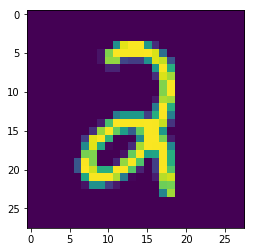

In [63]:
plt.imshow(data[1].squeeze())

In [28]:
net.save_params('cnn_mnist.param')